In [3]:
import numpy as np
from EMD import EMD
from lpsolve55 import *
import matplotlib.pyplot as plt
from tools import generate_normal

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# lp_solve toy example

In [ ]:
lp = lpsolve('make_lp', 0, 4)
lpsolve('set_verbose', lp, IMPORTANT)
lpsolve('set_obj_fn', lp, [1, 3, 6.24, 0.1])
lpsolve('add_constraint', lp, [0, 78.26, 0, 2.9], GE, 92.3)
lpsolve('add_constraint', lp, [0.24, 0, 11.31, 0], LE, 14.8)
lpsolve('add_constraint', lp, [12.68, 0, 0.08, 0.9], GE, 4)
lpsolve('set_lowbo', lp, [28.6, 0, 0, 18])
lpsolve('set_upbo', lp, [Infinite, Infinite, Infinite, 48.98])
lpsolve('set_col_name', lp, ['COLONE', 'COLTWO', 'COLTHREE', 'COLFOUR'])
lpsolve('set_row_name', lp, ['THISROW', 'THATROW', 'LASTROW'])
lpsolve('write_lp', lp, 'a.lp')
print lpsolve('get_mat', lp)[0]

In [ ]:
print lpsolve('get_mat', lp, 1, 2)

In [ ]:
lpsolve('solve', lp)
print lpsolve('get_objective', lp)
print lpsolve('get_variables', lp)[0]
print lpsolve('get_constraints', lp)[0]

# Generate random dataset

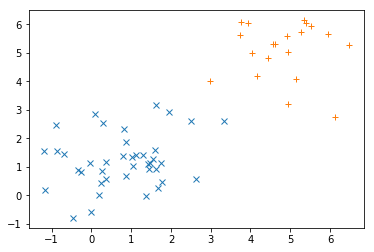

In [5]:
m = 40
n = 20
P_points, P_weights = generate_normal(m, [1,1])
Q_points, Q_weights = generate_normal(n, [5,5])
plt.plot(P_points[:,0],P_points[:,1], 'x')
plt.plot(Q_points[:,0],Q_points[:,1], '+')
plt.show()

## Computation of the Earth Mover Distance

In [6]:
d = lambda x,y: np.linalg.norm(x-y, ord=1)
emdPQ = EMD(zip(P_points, P_weights), zip(Q_points, Q_weights), d)

In [7]:
emdPQ.write_lp_problem('emd_pb.lp')

Done!


In [8]:
%%time
emdPQ.solve_lp()

CPU times: user 13.9 ms, sys: 314 µs, total: 14.3 ms
Wall time: 14.4 ms


In [9]:
emdPQ.distance

6.7368755327600871

In [10]:
emdPQ.objective

691.7193322745487

# Generate clustering problem

In [11]:
from sklearn.cluster import KMeans

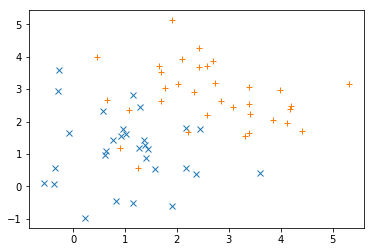

In [20]:
# generate 2 clusters

C1, _ = generate_normal(30, [1,1])
C2, _ = generate_normal(34, [3,3])
plt.plot(C1[:,0], C1[:,1], 'x')
plt.plot(C2[:,0], C2[:,1], '+')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hstack'